In [1]:
import matplotlib.pyplot as plt
import itertools
import pickle
legend_properties = {'weight':'bold'}

def get_indices_at_hamming_distance(base_index, dimension, hamming_dist):
    indices = []
    positions = range(dimension)

    # Flip exactly 'hamming_dist' bits
    for bits_to_flip in itertools.combinations(positions, hamming_dist):
        mask = 0
        for pos in bits_to_flip:
            mask |= (1 << pos)  # set bit at position `pos` to 1
        new_index = base_index ^ mask  # flip bits using XOR
        indices.append(new_index)

    return indices

dimension = 10
base_index = 2 ** dimension - 1  # [1, 1, ..., 1] in binary → 1023
index_across_distance = []
for hamming_distance in range(1, 11):
    index_list = get_indices_at_hamming_distance(base_index, dimension, hamming_distance)
    print(len(index_list))
    index_across_distance.append(index_list)


10
45
120
210
252
210
120
45
10
1


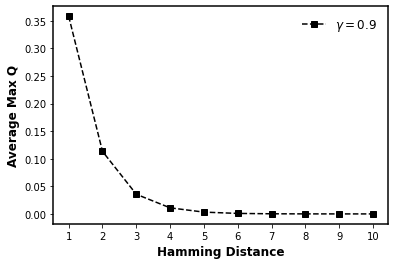

<Figure size 432x288 with 0 Axes>

In [3]:
from Q_learning import Agent
import numpy as np
results = []
gamma = 0.9
for _ in range(1000):
    q_agent = Agent(N=10, peak=1)
    for index in range(100):
        q_agent.learn(alpha=0.2, gamma=gamma)
    max_q_across_distance = []
    for index_list in index_across_distance:
        q_values = []
        for index in index_list:
            q_values.append(max(q_agent.Q_table[index]))
        max_q_value = sum(q_values) / len(q_values)
        max_q_across_distance.append(max_q_value)
    results.append(max_q_across_distance)
average_list = np.mean(results, axis=0)
# Figure 1: Ave Max Q across Hamming Distance
x =  range(1, 11)
# x = [50, 100, 150]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, average_list, "k--s", label="$\gamma={0}$".format(gamma))
# plt.plot(x, max_performance, "k-v", label="Max")
plt.xlabel("Hamming Distance", fontweight='bold', fontsize=12)
plt.ylabel('Average Max Q', fontweight='bold', fontsize=12)
plt.xticks(x)
# ax.set_ylim(0, 0.7)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(r"\Max_Q_across_Hamming.png", transparent=True, dpi=300)
plt.show()
plt.clf()
# should be start with 0.73 (max) and 0.82 (softmax)
# at the third sample, should be as close as to 1% difference

In [ ]:
from Q_learning import Agent
import numpy as np
results = []
gamma = 0
for _ in range(100):
    q_agent = Agent(N=10, peak=1)
    for index in range(100):
        q_agent.learn(alpha=0.2, gamma=gamma)
    max_q_across_distance = []
    for index_list in index_across_distance:
        q_values = []
        for index in index_list:
            q_values.append(max(q_agent.Q_table[index]))
        max_q_value = sum(q_values) / len(q_values)
        max_q_across_distance.append(max_q_value)
    results.append(max_q_across_distance)
average_list = np.mean(results, axis=0)
# Figure 1: Ave Max Q across Hamming Distance
x =  range(1, 11)
# x = [50, 100, 150]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, average_list, "k--s", label="$\gamma={0}$".format(gamma))
# plt.plot(x, max_performance, "k-v", label="Max")
plt.xlabel("Hamming Distance", fontweight='bold', fontsize=12)
plt.ylabel('Average Max Q', fontweight='bold', fontsize=12)
plt.xticks(x)
# ax.set_ylim(0, 0.7)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(r"\Max_Q_across_Hamming.png", transparent=True, dpi=300)
plt.show()
plt.clf()
# should be start with 0.73 (max) and 0.82 (softmax)
# at the third sample, should be as close as to 1% difference

In [ ]:
# Time to Solution as Organizational Performance
# TBD